In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

#Loading Data

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [ ]:
print(X.shape,y.shape)

(10000, 10) (10000,)


# Encoding categorical data

In [ ]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

#Train And Test Splitting

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

#Blending

In [ ]:
import pandas as pd
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_val = pd.DataFrame(X_val)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_val = pd.DataFrame(y_val)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
import pandas as pd

model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

val_pred1=model1.predict(X_val)
test_pred1=model1.predict(X_test)

val_pred1=pd.DataFrame(val_pred1)
test_pred1=pd.DataFrame(test_pred1)

In [ ]:
model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)

val_pred2=model2.predict(X_val)
test_pred2=model2.predict(X_test)

val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [ ]:
df_val=pd.concat([X_val, val_pred1,val_pred2],axis=1)
df_test=pd.concat([X_test, test_pred1,test_pred2],axis=1)

model = LogisticRegression()
print(model)
model.fit(df_val,y_val)
print("model.score(df_test,y_test): ",model.score(df_test,y_test))

df_test_pred = model.predict(df_test)
print("model.score(df_test,df_test_pred.reshape(-1, 1)) : ",model.score(df_test,df_test_pred.reshape(-1, 1)))

LogisticRegression()
model.score(df_test,y_test):  0.84
model.score(df_test,df_test_pred.reshape(-1, 1)) :  1.0


#Stacking

In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

def Stacking(model,train,y,test,n_fold):
  folds=StratifiedKFold(n_splits=n_fold)
  test_pred=np.empty((test.shape[0],1),float)
  train_pred=np.empty((0,1),float)
  for train_indices,val_indices in folds.split(train,y.values):
      x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
      y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]

      model.fit(X=x_train,y=y_train)
      train_pred=np.append(train_pred,model.predict(x_val))
      test_pred=np.append(test_pred,model.predict(test))
  return test_pred.reshape(-1,1),train_pred


In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [ ]:
model1 = DecisionTreeClassifier()

test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=X_train,test=X_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)


In [ ]:
model2 = KNeighborsClassifier()

test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10,train=X_train,test=X_test,y=y_train)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [ ]:
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = LogisticRegression()
model.fit(df,y_train)
print(model)

df_test_pred = model.predict(df_test)
model.score(df_test,df_test_pred.reshape(-1, 1))

LogisticRegression()


1.0

#WeightedAverage

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from scipy.stats import mode

model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)

final_pred=(pred1*0.3+pred2*0.3+pred3*0.4)
    
    
final_pred    

array([0. , 0. , 0.3, ..., 0. , 0. , 0. ])

#VotingClassifier

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
seed = 1075
np.random.seed(seed)
# Create classifiers
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()
clf_array = [rf, et, knn, svc, rg]
for clf in clf_array:
    vanilla_scores = cross_val_score(clf, X, y, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, max_samples=0.4, max_features=10, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=10, n_jobs=-1)
    
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]"  
                       .format(clf.__class__.__name__, vanilla_scores.mean(), vanilla_scores.std()))
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n"
                       .format(clf.__class__.__name__, bagging_scores.mean(), bagging_scores.std()))

Mean of: 0.863, std: (+/-) 0.006 [RandomForestClassifier]
Mean of: 0.861, std: (+/-) 0.008 [Bagging RandomForestClassifier]

Mean of: 0.855, std: (+/-) 0.008 [ExtraTreesClassifier]
Mean of: 0.859, std: (+/-) 0.008 [Bagging ExtraTreesClassifier]

Mean of: 0.766, std: (+/-) 0.008 [KNeighborsClassifier]
Mean of: 0.790, std: (+/-) 0.003 [Bagging KNeighborsClassifier]

Mean of: 0.796, std: (+/-) 0.000 [SVC]
Mean of: 0.796, std: (+/-) 0.000 [Bagging SVC]

Mean of: 0.801, std: (+/-) 0.004 [RidgeClassifier]
Mean of: 0.802, std: (+/-) 0.004 [Bagging RidgeClassifier]



In [ ]:
# Example of hard voting 
from sklearn.ensemble import VotingClassifier
clf = [rf, et, knn, svc, rg]
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et), ('KNeighbors', knn), ('SVC', svc), ('Ridge Classifier', rg)], voting='hard')
for clf, label in zip([rf, et, knn, svc, rg, eclf], ['Random Forest', 'Extra Trees', 'KNeighbors', 'SVC', 'Ridge Classifier', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.86 (+/- 0.01) [Random Forest]
Accuracy: 0.86 (+/- 0.01) [Extra Trees]
Accuracy: 0.77 (+/- 0.01) [KNeighbors]
Accuracy: 0.80 (+/- 0.00) [SVC]
Accuracy: 0.80 (+/- 0.00) [Ridge Classifier]
Accuracy: 0.82 (+/- 0.01) [Ensemble]


In [ ]:
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model3 = KNeighborsClassifier()
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('kn', model3)], voting='hard')

model.fit(X_train,y_train)
print("Voting Classifier model.score(X_test,y_test): ",model.score(X_test,y_test))

model1.fit(X_train,y_train)
print("model1.score(X_test,y_test) : ",model1.score(X_test,y_test))

model2.fit(X_train,y_train)
print("model2.score(X_test,y_test) : ",model2.score(X_test,y_test))

model3.fit(X_train,y_train)
print("model3.score(X_test,y_test) : ",model3.score(X_test,y_test))

Voting Classifier model.score(X_test,y_test):  0.836
model1.score(X_test,y_test) :  0.805
model2.score(X_test,y_test) :  0.7935
model3.score(X_test,y_test) :  0.829


#ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import model_selection

num_trees = 100
max_features = 7
kfold = model_selection.KFold(n_splits=10)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.8541000000000001


#Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()
bc.fit(X_train,y_train)

y_preds = bc.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7965


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n")
print(cm)
print("\n")
# classification report for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred)
print('Classification report : \n',matrix)

Confusion Matrix 

[[1593    2]
 [ 405    0]]


Classification report : 
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



#Adaboosting

AdaBoost stands for Adaptive Boosting. It is a statistical classification algorithm. It is an algorithm that forms a committee of weak classifiers. It boosts the performance of machine learning algorithms. It helps you form a committee of weak classifiers by combining them into a single strong classifier. It can be used to solve a wide range of problems. The main idea of AdaBoost classifier is to increase the weight of the unclassified points and also to decrease the weight of the classified points. In the case of the Adaboost classifier, the trees are not fully grown, and the trees are just one root and two leaves, called stumps. The algorithm is as follows:

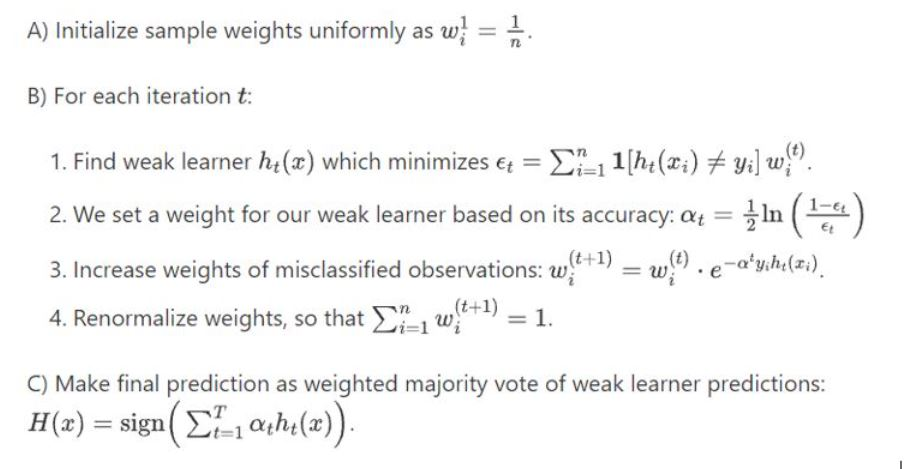

##Adaboost Classifer without Base Classifier

In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.862


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n")
print(cm)
print("\n")
# classification report for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred)
print('Classification report : \n',matrix)

Confusion Matrix 

[[1507   88]
 [ 188  217]]


Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      1595
           1       0.71      0.54      0.61       405

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



##Adaboost Classifer with Base Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

In [ ]:
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7965


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n")
print(cm)
print("\n")
# classification report for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred)
print('Classification report : \n',matrix)

Confusion Matrix 

[[1593    2]
 [ 405    0]]


Classification report : 
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



#LightGradientBoosting

In [ ]:
import lightgbm as lgb
train_data=lgb.Dataset(X_train,label=y_train)
#define parameters
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100) 
y_pred=model.predict(X_test)
print("Before y_pred: ",y_pred)

for i in range(0,len(y_pred)):
  if y_pred[i]>=0.5: 
    y_pred[i]=1
  else: 
    y_pred[i]=0
    
print("After y_pred: ",y_pred)    

Before y_pred:  [0.22083609 0.21723996 0.20513357 ... 0.19209375 0.22083609 0.20328223]
After y_pred:  [0. 0. 0. ... 0. 0. 0.]


#Gradient Boosting

In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier #For Classification

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8625


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n")
print(cm)
print("\n")
# classification report for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred)
print('Classification report : \n',matrix)

Confusion Matrix 

[[1514   81]
 [ 194  211]]


Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.72      0.52      0.61       405

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



#XGBoost

In [ ]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)


XGBClassifier(learning_rate=0.01, random_state=1)

In [ ]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8635


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n")
print(cm)
print("\n")
# classification report for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred)
print('Classification report : \n',matrix)

Confusion Matrix 

[[1544   51]
 [ 222  183]]


Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1595
           1       0.78      0.45      0.57       405

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000

